In [64]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patches as patches
from skimage import measure, morphology
from torchvision import transforms as T
import numpy as np
import cv2

In [10]:
# For the augmentation
# Since the images are huge 1024 x 1024 pixels
# We crop the images into four 512 x 512 images
# Same goes for the masks

No more pages
(1024, 1024, 4)


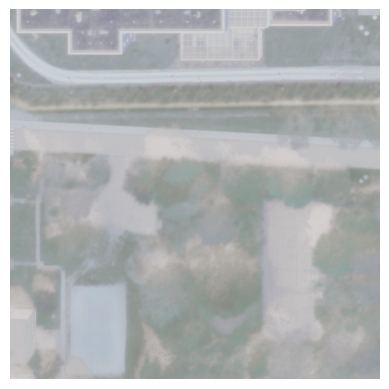

In [66]:
data = "data"
folder = "treecover_segmentation_aerial_goettingen"
tile_path = "tiles"
tile_filename = "tile_1.tif"
path_tile = os.path.join("..", data, folder, tile_path, tile_filename)
image_tile = Image.open(path_tile)
img = cv2.imread(path_tile, cv2.IMREAD_UNCHANGED)
try:
    image_tile.seek(1)
except EOFError:
    print("No more pages")
tile_array = np.array(img)
print(tile_array.shape)
plt.imshow(tile_array)
plt.axis("off")
plt.show()

(1024, 1024)


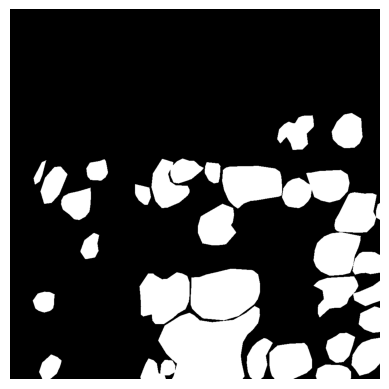

In [57]:
data = "data"
folder = "treecover_segmentation_aerial_goettingen"
mask_path = "masks"
mask_filename = "mask_1.tif"
path_mask = os.path.join("..", data, folder, mask_path, mask_filename)
image_mask = Image.open(path_mask)
mask_array = np.array(image_mask)
print(mask_array.shape)
plt.imshow(mask_array, cmap='gray')
plt.axis("off")
plt.show()

In [33]:
def split_images(tile_array, mask_array):
    # instead sample a 512 by 512 might be better
    # split into 4 patches
    # topleft
    tile_tl = tile_array[:512, :512]
    mask_tl = mask_array[:512, :512]

    # topright
    tile_tr = tile_array[:512, 512:]
    mask_tr = mask_array[:512, 512:]

    # bottomleft
    tile_bl = tile_array[512:, :512]
    mask_bl = mask_array[512:, :512]

    # bottomright
    tile_br = tile_array[512:, 512:]
    mask_br = mask_array[512:, 512:]

    patches = {
            'top left': (tile_tl, mask_tl),
            'top right': (tile_tr, mask_tr),
            'bottom left': (tile_bl, mask_bl),
            'bottom right': (tile_br, mask_br)
        }

    return patches

In [34]:
def visualize(patches):
    fig, axs = plt.subplots(2,4)
    axs = axs.flat
    for i, (title, (tile, mask)) in enumerate(patches.items()):
        axs[i].imshow(tile)
        axs[i+4].imshow(mask, cmap='gray')
        axs[i].set_title(title)
        axs[i].axis('off')
        axs[i+4].axis('off')

    plt.tight_layout()
    plt.show()

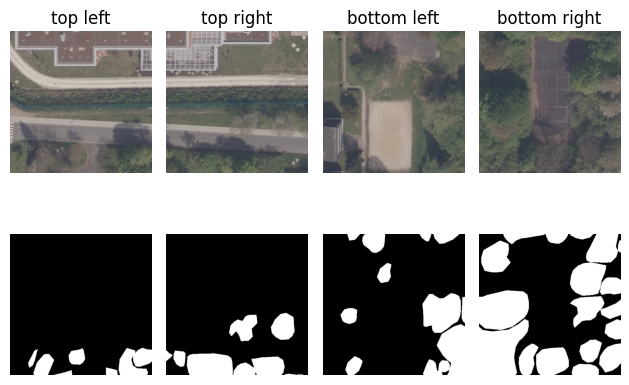

In [35]:
image_patches = split_images(tile_array,mask_array)
visualize(image_patches)

In [36]:
def random_crop(tile_array, mask_array):
    x_anchor = np.random.randint(0,512)
    y_anchor = np.random.randint(0,512)
    cropped_tile = tile_array[x_anchor:x_anchor+512, y_anchor:y_anchor+512]
    cropped_mask = mask_array[x_anchor:x_anchor+512, y_anchor:y_anchor+512]

    return cropped_tile, cropped_mask

In [46]:
piles = {}
for i in range(4):
    tile_crop, mask_crop = random_crop(tile_array,mask_array)
    piles[f'sample {i+1}'] = (tile_crop, mask_crop)

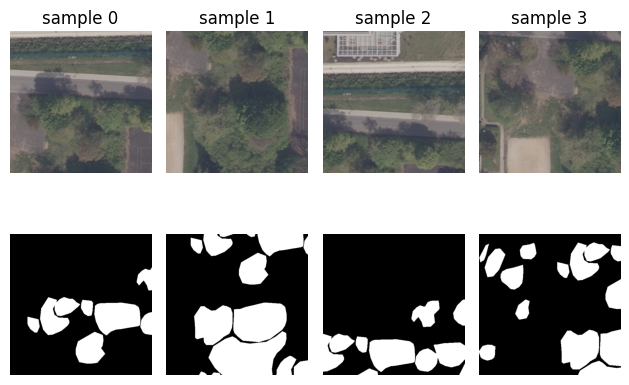

In [47]:
visualize(piles)

In [48]:
tile_crop.shape

(512, 512, 3)

In [ ]:
transform = T.Compose([
    T.RandomRotation(20),

])

augmented_img = transform(img)
augmented_img